<a href="https://colab.research.google.com/github/Juanvr/Dathoven/blob/main/notebooks/3%20-%20Analysing%20and%20Cleaning%20the%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing and Cleaning the Dataset

### Absolute tone

We get the dataset from the pickle file: 

In [1]:
! mkdir data

In [2]:
import requests

url = 'https://github.com/Juanvr/Dathoven/raw/main/compressed_data/songs_notes_with_tracks.p'
r = requests.get(url, allow_redirects=True)

open('data/songs_notes_with_tracks.p', 'wb').write(r.content);

In [3]:
# Load back from the pickle file.
import pickle

songs = pickle.load( open( "data/songs_notes_with_tracks.p", "rb" ) )

We create a pandas DataFrame for tracks:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)
import numpy as np

<Figure size 1280x640 with 0 Axes>

In [5]:
[ { "song_id": i, "number_of_tracks": len(song)} for i, song in enumerate(songs)][:10]

[{'number_of_tracks': 2, 'song_id': 0},
 {'number_of_tracks': 3, 'song_id': 1},
 {'number_of_tracks': 1, 'song_id': 2},
 {'number_of_tracks': 1, 'song_id': 3},
 {'number_of_tracks': 2, 'song_id': 4},
 {'number_of_tracks': 1, 'song_id': 5},
 {'number_of_tracks': 2, 'song_id': 6},
 {'number_of_tracks': 3, 'song_id': 7},
 {'number_of_tracks': 2, 'song_id': 8},
 {'number_of_tracks': 2, 'song_id': 9}]

In [6]:
tracks = []
[[tracks.append(track) for track in song] for song in songs];

In [7]:
tracks[:1]

[[{'absolute_offset': 0.0, 'duration': 0.25, 'name': 'B4', 'pitch': 71.0},
  {'absolute_offset': 0.25, 'duration': 0.25, 'name': 'F#5', 'pitch': 78.0},
  {'absolute_offset': Fraction(1, 3),
   'duration': 0.25,
   'name': 'G#4',
   'pitch': 68.0},
  {'absolute_offset': 0.75, 'duration': 0.25, 'name': 'B4', 'pitch': 71.0},
  {'absolute_offset': 1.0, 'duration': 0.25, 'name': 'B5', 'pitch': 83.0},
  {'absolute_offset': 1.5, 'duration': 0.25, 'name': 'B4', 'pitch': 71.0},
  {'absolute_offset': 1.75, 'duration': 0.25, 'name': 'F#5', 'pitch': 78.0},
  {'absolute_offset': 2.25, 'duration': 0.25, 'name': 'E-5', 'pitch': 75.0},
  {'absolute_offset': 2.5, 'duration': 0.25, 'name': 'F#5', 'pitch': 78.0},
  {'absolute_offset': Fraction(8, 3),
   'duration': 0.25,
   'name': 'G#4',
   'pitch': 68.0},
  {'absolute_offset': 3.0, 'duration': 0.25, 'name': 'B4', 'pitch': 71.0},
  {'absolute_offset': 3.25, 'duration': 0.25, 'name': 'F#5', 'pitch': 78.0},
  {'absolute_offset': Fraction(10, 3),
   'durat

In [8]:
len(songs), len(tracks)

(424, 1145)

In [9]:
np.argmax([1,2,3])

2

In [10]:
tracks_info = []
for i, track in enumerate(tracks):
  pitches = [note['pitch'] for note in track]
  max_pitch_index = np.argmax(pitches)
  min_pitch_index = np.argmin(pitches)
  max_pitch = pitches[max_pitch_index]
  min_pitch = pitches[min_pitch_index]
  pitch_range = max_pitch - min_pitch
  track_info = {
      "track_id": i,
      "number_of_notes": len(track), 
      "highest_pitch": max_pitch,
      "highest_pitch_note": track[max_pitch_index]['name'],
      "lowest_pitch": min_pitch, 
      "lowest_pitch_note": track[min_pitch_index]['name'],
      "pitch_range": pitch_range, 
      "notes": track
      }
  tracks_info.append(track_info)

In [11]:
tracks_df = pd.DataFrame(tracks_info)
tracks_df

,track_id,number_of_notes,highest_pitch,highest_pitch_note,lowest_pitch,lowest_pitch_note,pitch_range,notes
0,0,20,83.0,B5,68.0,G#4,15.0,"[{'absolute_offset': 0.0, 'pitch': 71.0, 'name..."
1,1,37,47.0,B2,40.0,E2,7.0,"[{'absolute_offset': 0.0, 'pitch': 47.0, 'name..."
2,2,9,78.0,F#5,73.0,C#5,5.0,"[{'absolute_offset': 0.0, 'pitch': 73.0, 'name..."
3,3,30,42.0,F#2,37.0,C#2,5.0,"[{'absolute_offset': 0.0, 'pitch': 38.0, 'name..."
4,4,16,85.0,C#6,66.0,F#4,19.0,"[{'absolute_offset': 0.0, 'pitch': 66.0, 'name..."
...,...,...,...,...,...,...,...,...
1140,1140,2,63.0,E-4,56.0,G#3,7.0,"[{'absolute_offset': 0.0, 'pitch': 56.0, 'name..."
1141,1141,37,41.0,F2,41.0,F2,0.0,"[{'absolute_offset': 7.5, 'pitch': 41.0, 'name..."
1142,1142,21,73.0,C#5,61.0,C#4,12.0,"[{'absolute_offset': 0.0, 'pitch': 68.0, 'name..."
1143,1143,9,75.0,E-5,54.0,F#3,21.0,"[{'absolute_offset': 0.0, 'pitch': 61.0, 'name..."


We analyse the number of notes:

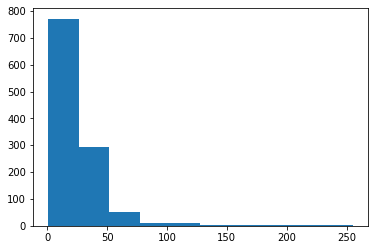

In [12]:
plt.hist(tracks_df['number_of_notes']);

In [13]:
import altair as alt

alt.Chart(tracks_df[['track_id', 'number_of_notes']]).mark_circle(size=60).encode(
    x='track_id',
    y='number_of_notes',
    color='number_of_notes',
    tooltip=['track_id']
).interactive()

alt.Chart(...)

We analyse the range of each track:

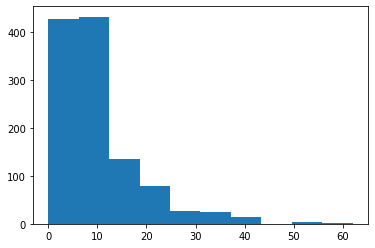

In [14]:
plt.hist(tracks_df['pitch_range']);

In [15]:
alt.Chart(tracks_df[['track_id', 'pitch_range']]).mark_circle(size=60).encode(
    x='track_id',
    y='pitch_range',
    color='pitch_range',
    tooltip=['track_id']
).interactive()

alt.Chart(...)

Let's look at song with the highest number of notes. Its id is 244:

In [16]:
biggest_track = tracks_df[tracks_df['track_id'] == 244]
biggest_track

,track_id,number_of_notes,highest_pitch,highest_pitch_note,lowest_pitch,lowest_pitch_note,pitch_range,notes
244,244,255,77.0,F5,34.0,B-1,43.0,"[{'absolute_offset': 0.0, 'pitch': 58.0, 'name..."


In [17]:
biggest_track.iloc[0]['notes'][:2]

[{'absolute_offset': 0.0, 'duration': 1.0, 'name': 'B-3', 'pitch': 58.0},
 {'absolute_offset': 3.75, 'duration': 0.75, 'name': 'B-2', 'pitch': 46.0}]

In [18]:
biggest_track_df = pd.DataFrame(biggest_track.iloc[0]['notes'])
biggest_track_df

,absolute_offset,pitch,name,duration
0,0,58.0,B-3,1
1,3.75,46.0,B-2,0.75
2,4,58.0,B-3,0.25
3,4.25,58.0,B-3,0.25
4,13/3,58.0,B-3,0.25
...,...,...,...,...
250,87.75,62.0,D4,0.25
251,88,62.0,D4,0.25
252,265/3,65.0,F4,0.25
253,88.75,65.0,F4,0.5


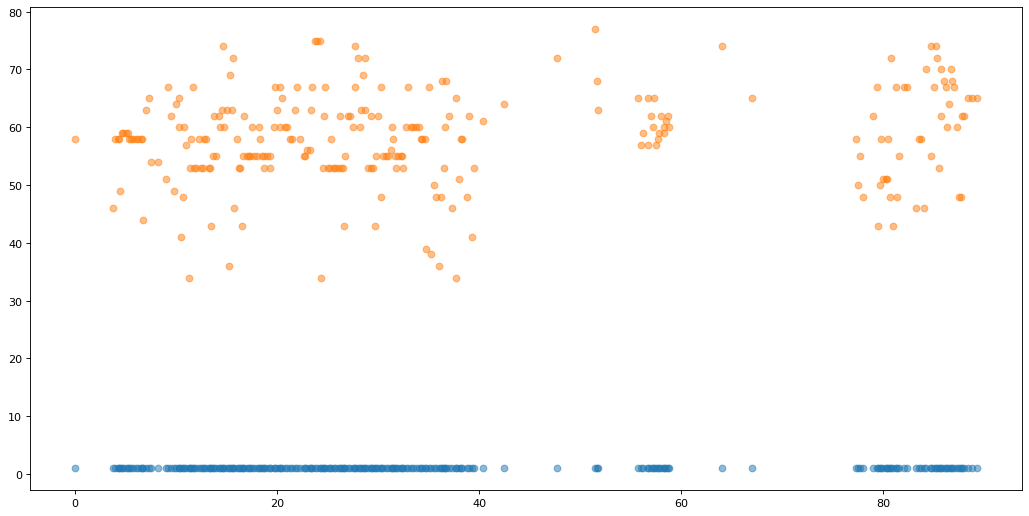

In [19]:
figure(figsize=(16, 8), dpi=80)
plt.scatter(biggest_track_df['absolute_offset'], np.ones(len(biggest_track_df)),alpha=0.5);
plt.scatter(biggest_track_df['absolute_offset'], biggest_track_df['pitch'],alpha=0.5);


It makes sense to divide the tracks that have long periods of silence into multiple "compact" melodies.

In [20]:
def get_track_relative_offsets(track): 
    relative_offsets = []
    for i in range(1,len(track) - 1):
        first_element = track[i-1]
        second_element = track[i]
        relative_offset = second_element['absolute_offset'] - first_element['absolute_offset']

        relative_offsets.append(relative_offset)
    return np.array(relative_offsets)

In [21]:
biggest_track

,track_id,number_of_notes,highest_pitch,highest_pitch_note,lowest_pitch,lowest_pitch_note,pitch_range,notes
244,244,255,77.0,F5,34.0,B-1,43.0,"[{'absolute_offset': 0.0, 'pitch': 58.0, 'name..."


In [22]:
track_to_divide = biggest_track.iloc[0]['notes']
track_to_divide[:2]

[{'absolute_offset': 0.0, 'duration': 1.0, 'name': 'B-3', 'pitch': 58.0},
 {'absolute_offset': 3.75, 'duration': 0.75, 'name': 'B-2', 'pitch': 46.0}]

In [23]:
rel_offsets = get_track_relative_offsets(track_to_divide)
rel_offsets[:10]

array([3.75, 0.25, 0.25, 0.08333333333333304, 0.16666666666666696,
       0.16666666666666696, 0.08333333333333304, 0.25, 0.25,
       0.08333333333333304], dtype=object)

In [24]:
np.where(rel_offsets > 0.25)

(array([  0,  18,  20,  21,  80,  93, 109, 157, 170, 171, 176, 178, 180,
        181, 182, 183, 186, 189, 203, 204, 205, 208, 209, 210, 224, 225,
        226, 231, 251, 252]),)

In [116]:
def divide_track(track):
  relative_offsets = get_track_relative_offsets(track)
  mean_relative_offset = relative_offsets.mean()

  # we search for notes that have a relative offset of more than 10 times the mean
  cut_positions = np.where(relative_offsets > (5 * mean_relative_offset))[0]

  #print(cut_positions)
  new_tracks = []
  for i in range(0,len(cut_positions)+1):
    cut_start = cut_positions[i - 1]+1 if i > 0 else 0
    cut_end = cut_positions[i]+1 if i <len(cut_positions) else len(track)

    new_tracks.append(track[cut_start:cut_end])

    #print(f"{i} track, [{cut_start}:{cut_end}] len: {len(track[cut_start:cut_end])}")

  return new_tracks 

In [117]:
divide_track(track_to_divide)

[[{'absolute_offset': 0.0, 'duration': 1.0, 'name': 'B-3', 'pitch': 58.0}],
 [{'absolute_offset': 3.75, 'duration': 0.75, 'name': 'B-2', 'pitch': 46.0},
  {'absolute_offset': 4.0, 'duration': 0.25, 'name': 'B-3', 'pitch': 58.0},
  {'absolute_offset': 4.25, 'duration': 0.25, 'name': 'B-3', 'pitch': 58.0},
  {'absolute_offset': Fraction(13, 3),
   'duration': 0.25,
   'name': 'B-3',
   'pitch': 58.0},
  {'absolute_offset': 4.5, 'duration': 1.5, 'name': 'C#3', 'pitch': 49.0},
  {'absolute_offset': Fraction(14, 3),
   'duration': 0.25,
   'name': 'B3',
   'pitch': 59.0},
  {'absolute_offset': 4.75, 'duration': 0.25, 'name': 'B3', 'pitch': 59.0},
  {'absolute_offset': 5.0, 'duration': 0.25, 'name': 'B3', 'pitch': 59.0},
  {'absolute_offset': 5.25, 'duration': 0.25, 'name': 'B3', 'pitch': 59.0},
  {'absolute_offset': Fraction(16, 3),
   'duration': 0.25,
   'name': 'B-3',
   'pitch': 58.0},
  {'absolute_offset': 5.5, 'duration': 0.25, 'name': 'B-3', 'pitch': 58.0},
  {'absolute_offset': 5.75

In [118]:
len(track_to_divide)

255

In [128]:
len(divide_track(track_to_divide))

9

In [129]:
np.sum([len(track) for track in divide_track(track_to_divide)])

255

Now we can apply this to all of the tracks: 

In [130]:
len(tracks)

1145

In [131]:
divided_tracks = []

for track in tracks:
  if len(track) > 10:
    divided = divide_track(track)
    divided_tracks += divided


In [132]:
len(divided_tracks)

963

In [145]:
filtered_tracks = list(filter(lambda track: len(track) > 10, divided_tracks))

In [146]:
len(filtered_tracks)

772

Let's see the differences now with these tracks: 

In [147]:
tracks_info = []
for i, track in enumerate(filtered_tracks):
  pitches = [note['pitch'] for note in track]
  max_pitch_index = np.argmax(pitches)
  min_pitch_index = np.argmin(pitches)
  max_pitch = pitches[max_pitch_index]
  min_pitch = pitches[min_pitch_index]
  pitch_range = max_pitch - min_pitch
  track_info = {
      "track_id": i,
      "number_of_notes": len(track), 
      "highest_pitch": max_pitch,
      "highest_pitch_note": track[max_pitch_index]['name'],
      "lowest_pitch": min_pitch, 
      "lowest_pitch_note": track[min_pitch_index]['name'],
      "pitch_range": pitch_range, 
      "notes": track
      }
  tracks_info.append(track_info)

In [148]:
tracks_filtered_df = pd.DataFrame(tracks_info)

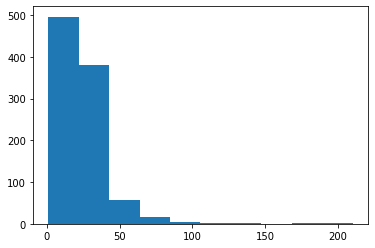

In [149]:
plt.hist(tracks_divided_df['number_of_notes']);

In [150]:
alt.Chart(tracks_filtered_df[['track_id', 'number_of_notes']]).mark_circle(size=60).encode(
    x='track_id',
    y='number_of_notes',
    color='number_of_notes',
    tooltip=['track_id', 'number_of_notes']
).interactive()

alt.Chart(...)

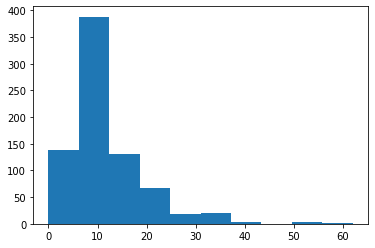

In [151]:
plt.hist(tracks_filtered_df['pitch_range']);

In [152]:
alt.Chart(tracks_filtered_df[['track_id', 'pitch_range']]).mark_circle(size=60).encode(
    x='track_id',
    y='pitch_range',
    color='pitch_range',
    tooltip=['track_id']
).interactive()

alt.Chart(...)

Let's look at song with the highest number of notes. Its id is 550:

In [154]:
biggest_track = tracks_filtered_df[tracks_divided_df['track_id'] == 550]
biggest_track

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,track_id,number_of_notes,highest_pitch,highest_pitch_note,lowest_pitch,lowest_pitch_note,pitch_range,notes
550,550,210,88.0,E6,52.0,E3,36.0,"[{'absolute_offset': 0.0, 'pitch': 81.0, 'name..."


In [155]:
biggest_track.iloc[0]['notes'][:2]

[{'absolute_offset': 0.0, 'duration': 0.25, 'name': 'A5', 'pitch': 81.0},
 {'absolute_offset': 0.25, 'duration': 0.25, 'name': 'G5', 'pitch': 79.0}]

In [156]:
biggest_track_df = pd.DataFrame(biggest_track.iloc[0]['notes'])
biggest_track_df

,absolute_offset,pitch,name,duration
0,0,81.0,A5,0.25
1,0.25,79.0,G5,0.25
2,1/3,81.0,A5,0.25
3,0.5,84.0,C6,0.25
4,2/3,81.0,A5,0.25
...,...,...,...,...
205,44,84.0,C6,0.25
206,44.25,76.0,E5,0.25
207,133/3,76.0,E5,0.25
208,44.5,69.0,A4,0.25


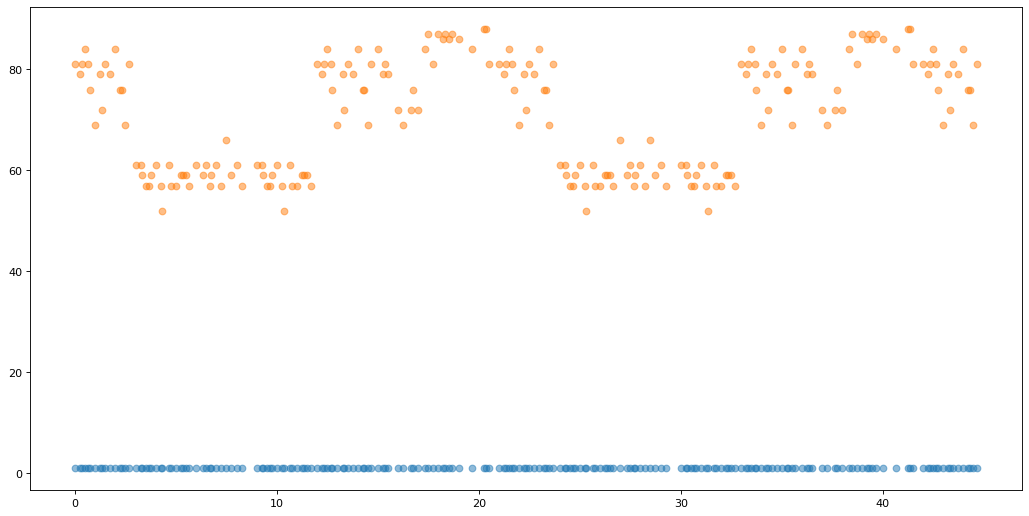

In [157]:
figure(figsize=(16, 8), dpi=80)
plt.scatter(biggest_track_df['absolute_offset'], np.ones(len(biggest_track_df)),alpha=0.5);
plt.scatter(biggest_track_df['absolute_offset'], biggest_track_df['pitch'],alpha=0.5);


It looks much more uniform

In [162]:
len(filtered_tracks)

772

In [159]:
pickle.dump( filtered_tracks, open( "clean_tracks_absolute.p", "wb" ) )

## Interval approach

In [160]:
def from_pitches_to_intervals_with_time (array_of_pitches_with_time):
    intervals_with_time = []
    for i in range(1,len(array_of_pitches_with_time) - 1):

        first_element = array_of_pitches_with_time[i-1]
        second_element = array_of_pitches_with_time[i]
        resultElement = {
            'relative_offset': second_element['absolute_offset'] - first_element['absolute_offset'],
            'interval': second_element['pitch'] - first_element['pitch'],
            'duration': second_element['duration'], 
            'name': second_element['name'], 
            #'element': second_element['element']
        }
        intervals_with_time.append(resultElement)
    return intervals_with_time

In [163]:
filtered_intervals = [from_pitches_to_intervals_with_time(track) for track in filtered_tracks]

In [164]:
len(filtered_intervals)

772

In [165]:
pickle.dump( filtered_intervals, open( "clean_tracks_interval.p", "wb" ) )